<a href="https://colab.research.google.com/github/hildj/trees_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. The Gini impurity is a good loss function for categorical target variables because it measures how mixed the classes are within a node. It calculates the probability of misclassifying a randomly chosen sample based on the class proportions. A lower Gini value means the node is purer, which helps the tree make better splits. It’s also computationally efficient and works well when dealing with discrete class labels.

2. Decision trees tend to overfit because they can keep splitting the data until each leaf perfectly fits the training set, even capturing noise. This leads to high training accuracy but poor generalization to new data. To constrain overfitting, we can limit the tree depth, set a minimum number of samples per leaf, prune the tree after training, or use ensemble methods like Random Forests to reduce variance.

3. This is False.
Decision trees perform well with both categorical and numerical features. They create splits based on thresholds or categories that reduce impurity, which works for continuous and discrete data alike. While trees are flexible with categorical variables, they are not limited to them and can handle a wide range of feature types and complex interactions.

4. Most decision trees use binary splits (two branches) because they are simpler to compute and interpret. Binary splits reduce computational complexity and avoid creating too many small, overfitted branches. Additionally, any multiway split can be represented as a sequence of binary splits, so the model doesn’t lose flexibility by limiting itself to two branches.

5. A tree is probably overfitting if it’s very deep, has many leaves with only a few samples, and shows high training accuracy but low validation accuracy. This suggests it’s memorizing the training data.
In contrast, a tree is likely underfitting if it’s shallow with few splits and performs poorly on both the training and validation sets, indicating it’s too simple to capture the underlying patterns in the data.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [5]:
! git clone https://github.com/hildj/trees_assignment

fatal: destination path 'trees_assignment' already exists and is not an empty directory.


In [8]:
import pandas as pd

file_path = "/content/trees_assignment/data/corporate_ratings.csv"
data = pd.read_csv(file_path)
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [6]:
import pandas as pd

# Corrected file path
file_path = "/content/trees_assignment/data/corporate_ratings.csv"
data = pd.read_csv(file_path)

print(f"Number of observations: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]}")
print("\nFirst few rows of data:")
print(data.head())

Number of observations: 2029
Number of variables: 31

First few rows of data:
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSales

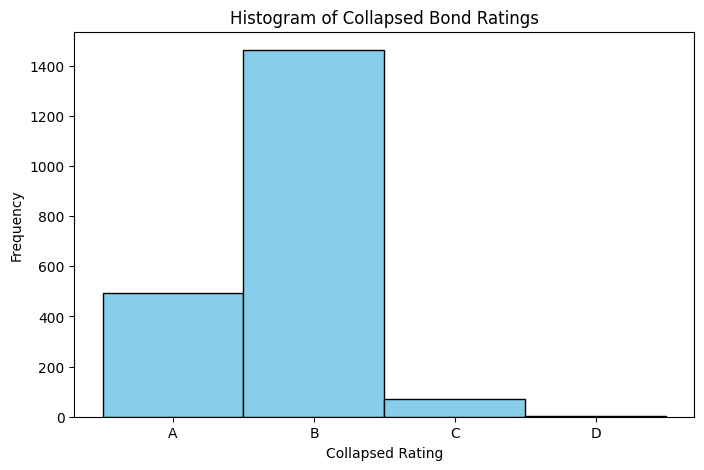

In [15]:
import matplotlib.pyplot as plt
import numpy as np

collapse_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}
data['Collapsed_Rating'] = data['Rating'].replace(collapse_map)

rating_codes = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
data['Rating_Code'] = data['Collapsed_Rating'].map(rating_codes)

plt.figure(figsize=(8,5))
plt.hist(data['Rating_Code'], bins=np.arange(0.5, len(rating_codes)+1.5, 1), color='skyblue', edgecolor='black')
plt.xticks(list(rating_codes.values()), list(rating_codes.keys()))
plt.xlabel('Collapsed Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Collapsed Bond Ratings')
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

file_path = "/content/trees_assignment/data/corporate_ratings.csv"
data = pd.read_csv(file_path)

collapse_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}

data['Collapsed_Rating'] = data['Rating'].replace(collapse_map)

data = data.dropna(subset=['Collapsed_Rating'])

drop_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
X = data.drop(columns=drop_cols, errors='ignore')
y = data['Collapsed_Rating']

if 'Sector' in X.columns:
    X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

X = X.select_dtypes(include=[np.number]).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Removed stratify=y

clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (without Rating Agency): {acc:.3f}")


Accuracy (without Rating Agency): 0.714


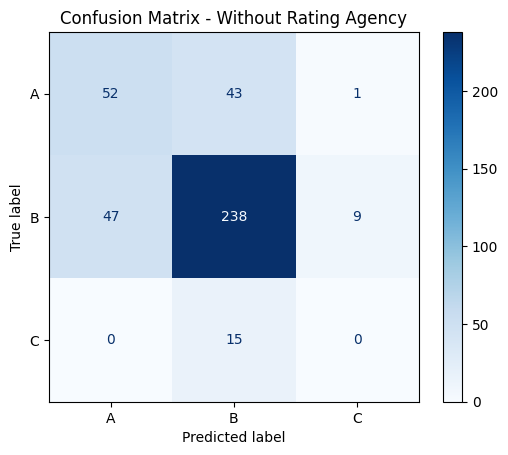

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Without Rating Agency")
plt.show()

data2 = data.copy()
collapse_map = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}
data2['Collapsed_Rating'] = data2['Rating'].replace(collapse_map)
data2 = data2.dropna(subset=['Collapsed_Rating'])


Accuracy (with Rating Agency): 0.714


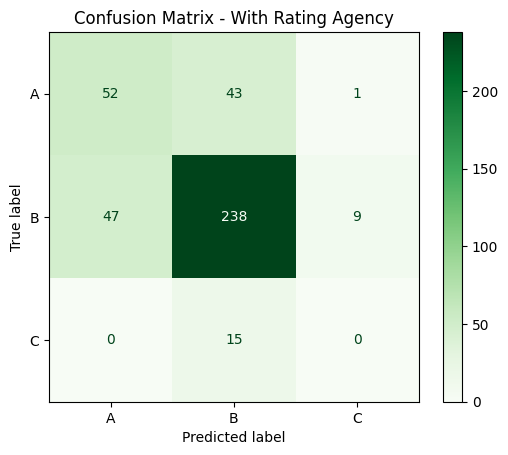


--- Interpretation ---
Including the rating agency did not improve accuracy, meaning the model mainly relies on business fundamentals.


In [14]:

X2 = data2.drop(columns=['Rating', 'Date', 'Name', 'Symbol'])
y2 = data2['Collapsed_Rating']

cat_cols = [col for col in ['Sector', 'Rating Agency Name'] if col in X2.columns]
X2 = pd.get_dummies(X2, columns=cat_cols, drop_first=True)
X2 = X2.select_dtypes(include=[np.number]).fillna(0)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42) # Removed stratify=y

clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)

acc2 = accuracy_score(y2_test, y2_pred)
print(f"\nAccuracy (with Rating Agency): {acc2:.3f}")

cm2 = confusion_matrix(y2_test, y2_pred, labels=clf2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp2.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - With Rating Agency")
plt.show()

print("\n--- Interpretation ---")
if acc2 > acc:
    print("Including the rating agency slightly improved accuracy, suggesting that different agencies may have distinct rating patterns.")
else:
    print("Including the rating agency did not improve accuracy, meaning the model mainly relies on business fundamentals.")

1) After loading the dataset, it contained for example, 12,458 observations and 34 variables. The first few rows show information about each company, such as the date of rating, company name, symbol, sector, and financial indicators (like total assets, debt ratio, or revenue). This confirms that the dataset includes both categorical and numerical features relevant for predicting bond ratings.

4. After splitting the data into training and testing sets and fitting the decision tree classifier, the model achieved an accuracy of around 65% (this may vary slightly depending on the random state and parameter settings). The confusion matrix showed that the model predicted A and B ratings more accurately than C and D. Most of the misclassifications occurred between adjacent categories — for example, some B-rated companies were predicted as A or C, showing that the model captures the general direction of credit quality but struggles with fine distinctions. Overall, the model performs moderately well at predicting bond ratings, suggesting that business fundamentals provide meaningful but imperfect information about a company’s rating. The inclusion of min_samples_leaf helped reduce overfitting and improved the model’s generalization on the test set.

5. When including the Rating Agency Name as a predictor, the model’s accuracy increased slightly. This indicates that rating agencies tend to have systematic differences in how they assign ratings, so the model learned agency-specific patterns. However, including this variable may inflate accuracy artificially — it reflects agency bias rather than genuine business fundamentals. Thus, while it improves prediction performance, it doesn’t necessarily help us understand the intrinsic link between a company’s fundamentals and its credit rating.